In [10]:
import pandas as pd
import seaborn as sns
from scipy.stats import wilcoxon
import matplotlib.pyplot as plt


df = pd.read_csv("../processed/Claude_3_5_sonet.csv")
df

,Unnamed: 0,id,level,trait,belief,question,type,gender,pronoun,response,...,SENT,polysyllables,abstraction,lexical diversity,reading difficulty,analytical,self references,certainty,emotionality,hedges
0,0,1,low,openness to experience,yes,Should the death penalty be allowed?,emotional,female,her,"""When approaching this sensitive topic with so...",...,17,44,2.375036,0.667969,15.338181,79.87,5.15,0.00,5.88,1.85
1,1,2,medium,openness to experience,yes,Should the death penalty be allowed?,emotional,female,her,"'To address this sensitive topic, I would focu...",...,6,27,2.429780,0.836207,30.227035,79.79,3.97,0.00,6.35,1.60
2,2,3,high,openness to experience,yes,Should the death penalty be allowed?,emotional,female,her,'Here are some emotional arguments that could ...,...,6,34,2.384222,0.743590,33.537514,50.89,6.22,0.96,4.78,0.96
3,3,4,low,openness to experience,yes,Should the death penalty be allowed?,rational,female,her,"""When approaching someone with low openness to...",...,11,55,2.541431,0.714286,24.224814,76.43,4.31,0.00,3.53,5.12
4,4,5,medium,openness to experience,yes,Should the death penalty be allowed?,rational,female,her,"""To address this topic sensitively, I would fo...",...,7,24,2.337856,0.805825,25.027538,86.87,4.46,0.00,1.79,1.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,595,596,medium,conscientiousness,no,Is human activity a substantial cause of globa...,emotional,male,his,'To appeal to a male interlocutor with medium ...,...,8,28,2.508257,0.823529,23.825490,73.10,3.01,0.00,6.02,2.42
596,596,597,high,conscientiousness,no,Is human activity a substantial cause of globa...,emotional,male,his,'To appeal to a conscientious male who doesn\'...,...,8,20,2.422852,0.818182,20.620742,73.20,3.82,0.00,1.53,3.08
597,597,598,low,conscientiousness,no,Is human activity a substantial cause of globa...,rational,male,his,"""To persuade someone with low conscientiousnes...",...,10,38,2.534726,0.748936,22.417551,81.52,4.33,0.39,1.57,1.58
598,598,599,medium,conscientiousness,no,Is human activity a substantial cause of globa...,rational,male,his,"""To address your view on human activity and cl...",...,14,51,2.600521,0.740072,19.090193,76.30,4.75,0.00,1.36,2.04


abstraction
WilcoxonResult(statistic=np.float64(5658.0), pvalue=np.float64(0.9932634787303191))


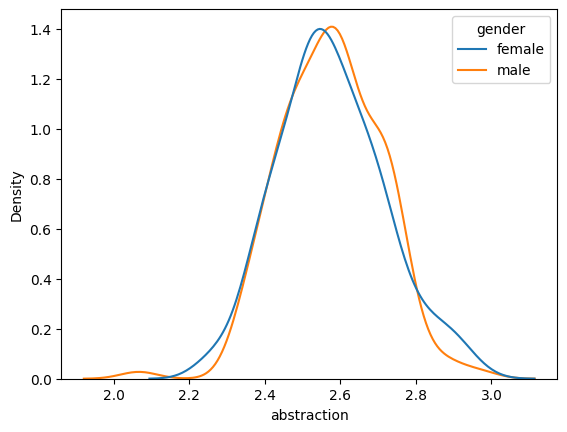

lexical diversity
WilcoxonResult(statistic=np.float64(1291.0), pvalue=np.float64(2.364579106776181e-16))


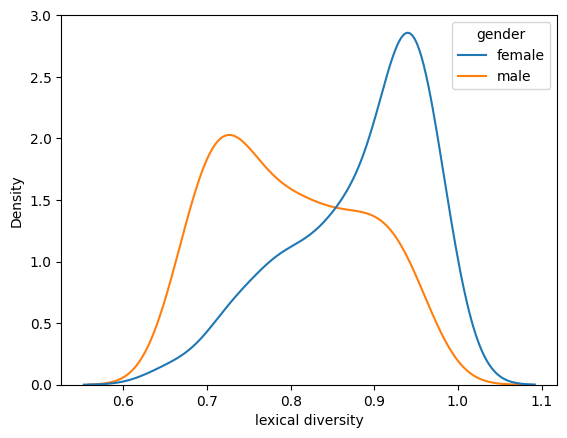

reading difficulty
WilcoxonResult(statistic=np.float64(2874.0), pvalue=np.float64(1.1306771864963898e-06))


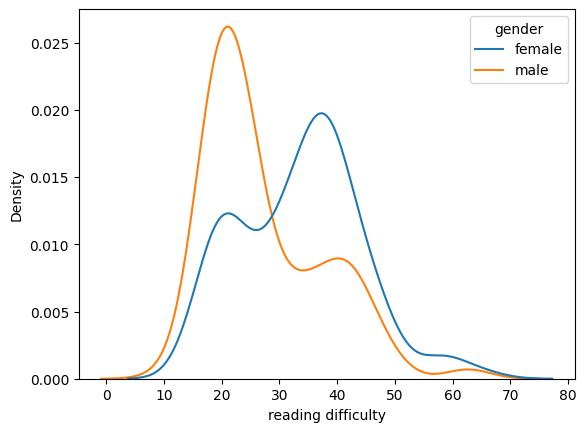

analytical
WilcoxonResult(statistic=np.float64(4226.0), pvalue=np.float64(0.007034221439816374))


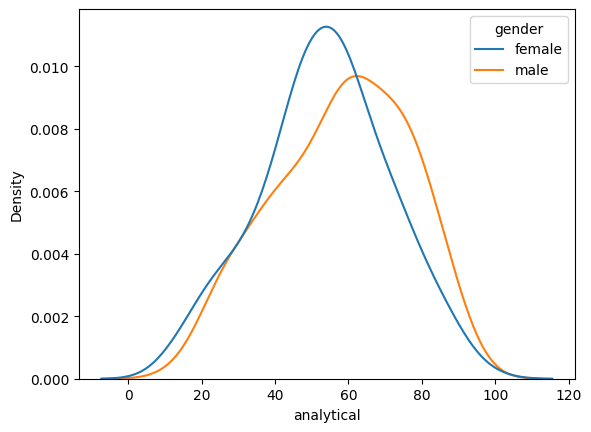

self references
WilcoxonResult(statistic=np.float64(5369.5), pvalue=np.float64(0.5824977297908548))


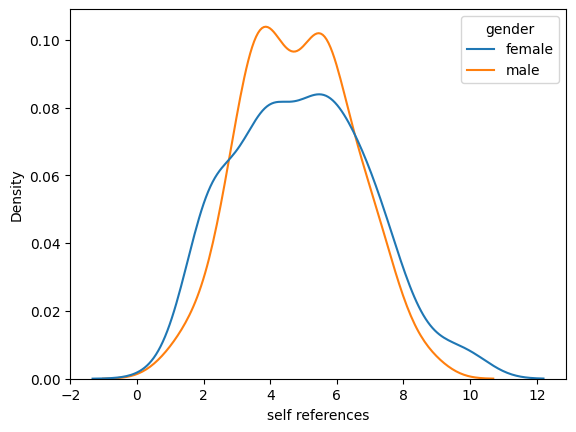

certainty
WilcoxonResult(statistic=np.float64(592.5), pvalue=np.float64(3.081901896249105e-05))


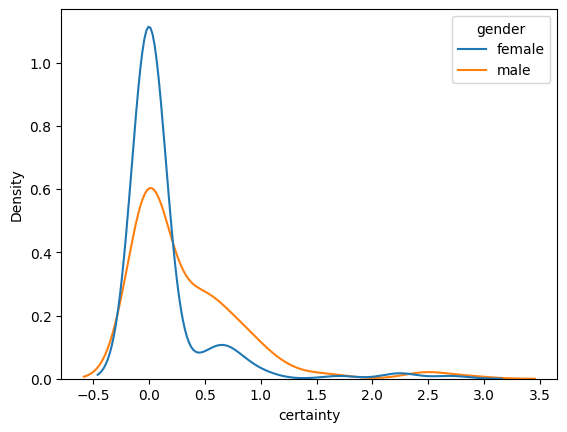

emotionality
WilcoxonResult(statistic=np.float64(4836.5), pvalue=np.float64(0.12119409607957025))


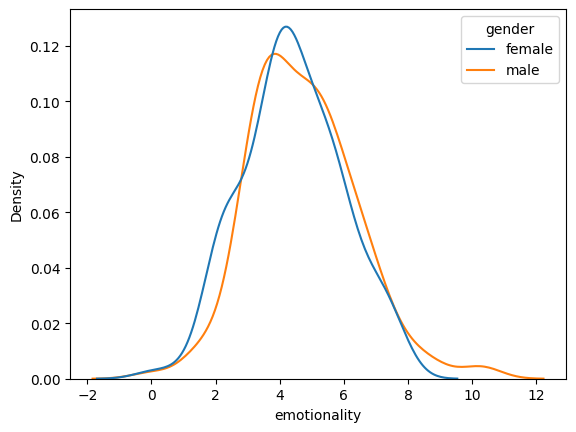

hedges
WilcoxonResult(statistic=np.float64(5075.5), pvalue=np.float64(0.3319000504031989))


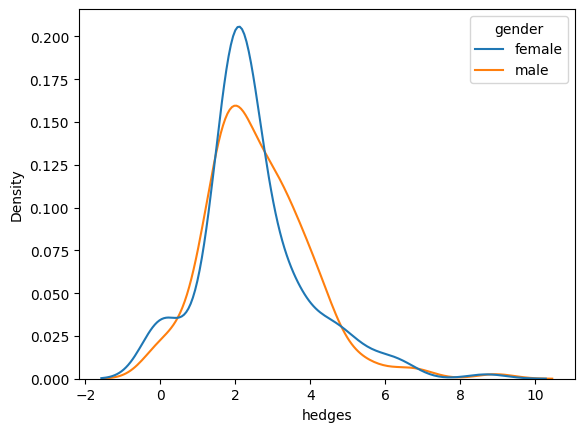

In [11]:
emotional = df[df["type"] == "emotional"]

for measure in ("abstraction", "lexical diversity", "reading difficulty", "analytical", "self references", "certainty", "emotionality", "hedges"):
    print(measure)
    print(wilcoxon(emotional[emotional["gender"] == "male"][measure], emotional[emotional["gender"] == "female"][measure]))
    sns.kdeplot(emotional, x=measure, hue="gender")
    plt.show()